**Predict Breast Cancer with Random Forest, PCA and SVM**

In [72]:
__author__ = "Mohini More"
__email__ = "moremohini@2210gmail.com"
__website__ = "Mohini-More.github.io"

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)
%matplotlib inline


**Part 1 - Introduction**

In this project I am going to utilize Principal Components Analysis (PCA) to transform the breast cancer dataset and then use the Support Vector Machine model to predict whether a patient has breast cancer.

I have taken a great Machine Learning course by Jose Portilla on Udemy and now I want to apply what I have learnt so far to perform a comprehensive exploratory data analysis on this data and to predict breast cancer based on feature variables.

**Dataset information**

The Breast Cancer Wisconsin (Diagnostic) Data Set is obtained from UCI Machine Learning Repository. Features are computed from a digitized image of a fine needle aspirate (FNA) of a breast mass. They describe characteristics of the cell nuclei present in the image.

The dataset is also available in the Scikit Learn library. I will use Scikit Learn to import the dataset and explore its attributes.

In [3]:
from sklearn.datasets import load_breast_cancer
cancer = load_breast_cancer()

In [4]:
cancer.keys()

dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename', 'data_module'])

In [5]:
print(cancer.DESCR[27:3130])


Breast cancer wisconsin (diagnostic) dataset
--------------------------------------------

**Data Set Characteristics:**

:Number of Instances: 569

:Number of Attributes: 30 numeric, predictive attributes and the class

:Attribute Information:
    - radius (mean of distances from center to points on the perimeter)
    - texture (standard deviation of gray-scale values)
    - perimeter
    - area
    - smoothness (local variation in radius lengths)
    - compactness (perimeter^2 / area - 1.0)
    - concavity (severity of concave portions of the contour)
    - concave points (number of concave portions of the contour)
    - symmetry
    - fractal dimension ("coastline approximation" - 1)

    The mean, standard error, and "worst" or largest (mean of the three
    worst/largest values) of these features were computed for each image,
    resulting in 30 features.  For instance, field 0 is Mean Radius, field
    10 is Radius SE, field 20 is Worst Radius.

    - class:
            - WDBC-M

**Part 2 - Discover
Load the data bold text**

Let's take a look at feature variables:

In [6]:
df_features = pd.DataFrame(cancer.data, columns = cancer.feature_names)
df_features.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 30 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   mean radius              569 non-null    float64
 1   mean texture             569 non-null    float64
 2   mean perimeter           569 non-null    float64
 3   mean area                569 non-null    float64
 4   mean smoothness          569 non-null    float64
 5   mean compactness         569 non-null    float64
 6   mean concavity           569 non-null    float64
 7   mean concave points      569 non-null    float64
 8   mean symmetry            569 non-null    float64
 9   mean fractal dimension   569 non-null    float64
 10  radius error             569 non-null    float64
 11  texture error            569 non-null    float64
 12  perimeter error          569 non-null    float64
 13  area error               569 non-null    float64
 14  smoothness error         5

In [7]:
cancer.target_names

array(['malignant', 'benign'], dtype='<U9')

In [8]:
df_target = pd.DataFrame(cancer.target, columns=['target'])
df_target['target'].value_counts()

,count
target,
1,357
0,212


According to the dataset's description, the distribution of the target variable is: 212 - Malignant, 357 - Benign. Thus, 'benign' and 'maglinant' are presented as 1 and 0, respectively.

Let's merge the features and the target variable together:

In [10]:
df = pd.concat([df_features, df_target], axis=1)

In [11]:
df['target'] = df['target'].apply(lambda x: "Benign"
                                  if x == 1 else "Malignant")
df.head(5)


,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,target
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,Malignant
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,Malignant
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,Malignant
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,Malignant
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,Malignant


In [12]:
df.describe()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
count,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,0.062798,...,16.269190,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946
std,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,0.007060,...,4.833242,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061
min,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,0.049960,...,7.930000,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040
25%,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,0.057700,...,13.010000,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460
50%,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,0.061540,...,14.970000,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040
75%,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,0.066120,...,18.790000,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080
max,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,0.097440,...,36.040000,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500


**Exploratory Data Analysis**

In [13]:
# Set style
sns.set_style('darkgrid')

**Count plot of each diagnosis¶**

In [14]:
df['target'].value_counts()

,count
target,
Benign,357
Malignant,212


Text(0.5, 1.0, 'Count Plot of Diagnosis')

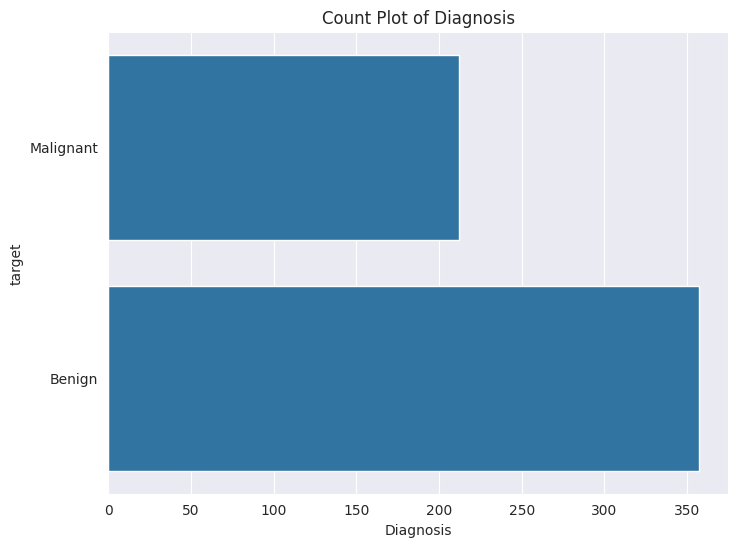

In [15]:
plt.figure(figsize=(8, 6))
sns.countplot(df['target'])
plt.xlabel("Diagnosis")
plt.title("Count Plot of Diagnosis")

**Distribution of features**
Now I will take a look at the distribution of each feature and see how they are different between 'benign' and 'malignant'. To see the distribution of multiple variables, we can use violin plot, swarm plot or box plot. Let's try each of these plots.

To visualize distributions of multiple features in one figure, first I need to standardize the data:

In [19]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaler.fit(df_features)

features_scaled = scaler.transform(df_features)
features_scaled = pd.DataFrame(data=features_scaled,
                               columns=df_features.columns)

df_scaled = pd.concat([features_scaled, df['target']], axis=1)

In [20]:
df_scaled_melt = pd.melt(df_scaled, id_vars='target',
                         var_name='features', value_name='value')
df_scaled_melt.head(3)

,target,features,value
0,Malignant,mean radius,1.097064
1,Malignant,mean radius,1.829821
2,Malignant,mean radius,1.579888


There are 30 features so I will create a violin plot, a swarm plot and a box plot for each batch of 10 features:

In [22]:
def violin_plot(features, name):
    """
    This function creates violin plots of features given in the argument.
    """
    # Create query
    query = ''
    for x in features:
        query += "features == '" + str(x) + "' or "
    query = query[0:-4]

    # Create data for visualization
    data = df_scaled_melt.query(query)

    # Plot figure
    plt.figure(figsize=(12, 6))
    sns.violinplot(x='features',
                   y='value',
                   hue='target',
                   data=data,
                   split=True,
                   inner="quart")
    plt.xticks(rotation=45)
    plt.title(name)
    plt.xlabel("Features")
    plt.ylabel("Standardize Value")


def swarm_plot(features, name):
    """
    This function creates swarm plots of features given in the argument.
    """
    # Create query
    query = ''
    for x in features:
        query += "features == '" + str(x) + "' or "
    query = query[0:-4]

    # Create data for visualization
    data = df_scaled_melt.query(query)

    # Plot figure
    plt.figure(figsize=(12, 6))
    sns.swarmplot(x='features', y='value', hue='target', data=data)
    plt.xticks(rotation=45)
    plt.title(name)
    plt.xlabel("Features")
    plt.ylabel("Standardize Value")


def box_plot(features, name):
    """
    This function creates box plots of features given in the argument.
    """
    # Create query
    query = ''
    for x in features:
        query += "features == '" + str(x) + "' or "
    query = query[0:-4]

    # Create data for visualization
    data = df_scaled_melt.query(query)

    # Plot figure
    plt.figure(figsize=(12, 6))
    sns.boxplot(x='features', y='value', hue='target', data=data)
    plt.xticks(rotation=45)
    plt.title(name)
    plt.xlabel("Features")
    plt.ylabel("Standardize Value")


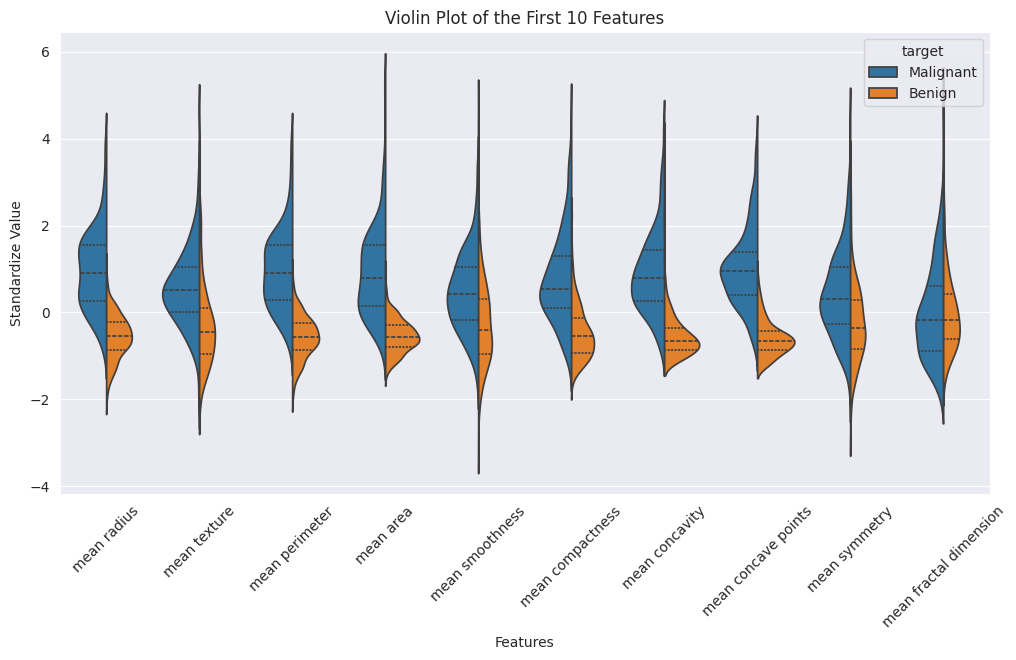

In [23]:
violin_plot(df.columns[0:10], "Violin Plot of the First 10 Features")

/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:3399: UserWarning: 71.2% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:3399: UserWarning: 68.4% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:3399: UserWarning: 72.4% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:3399: UserWarning: 75.4% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:3399: UserWarning: 68.9% of the points cannot be plac

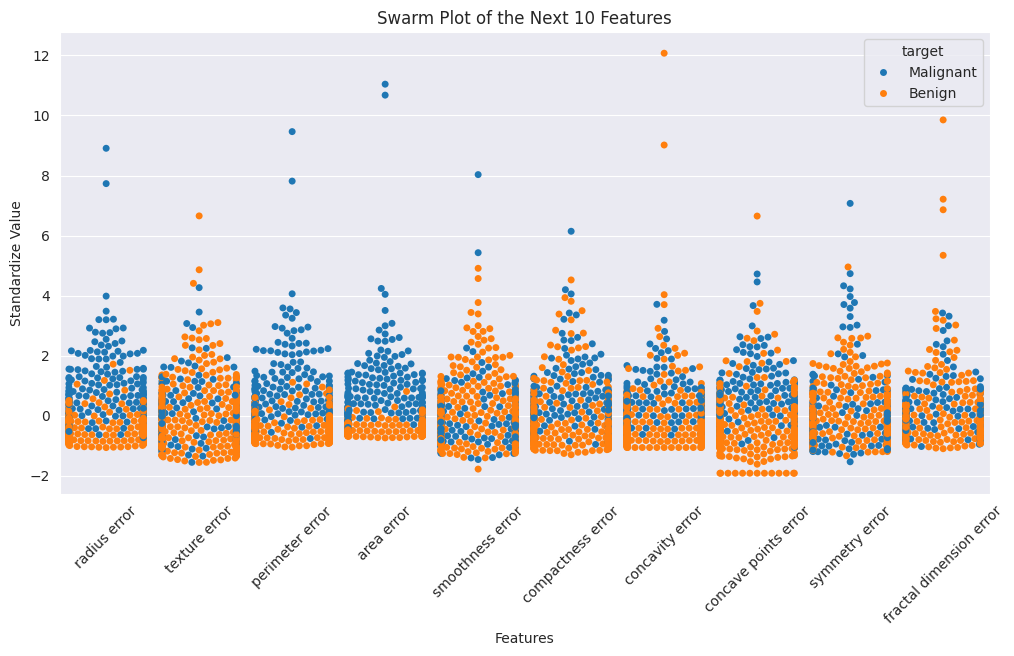

In [24]:
swarm_plot(df.columns[10:20], "Swarm Plot of the Next 10 Features")


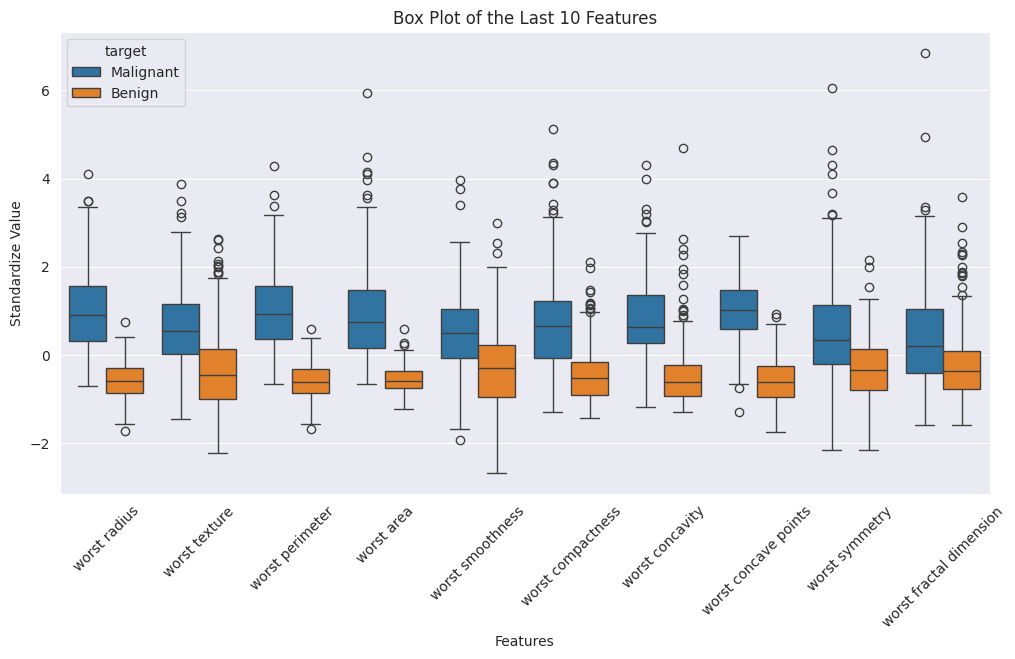

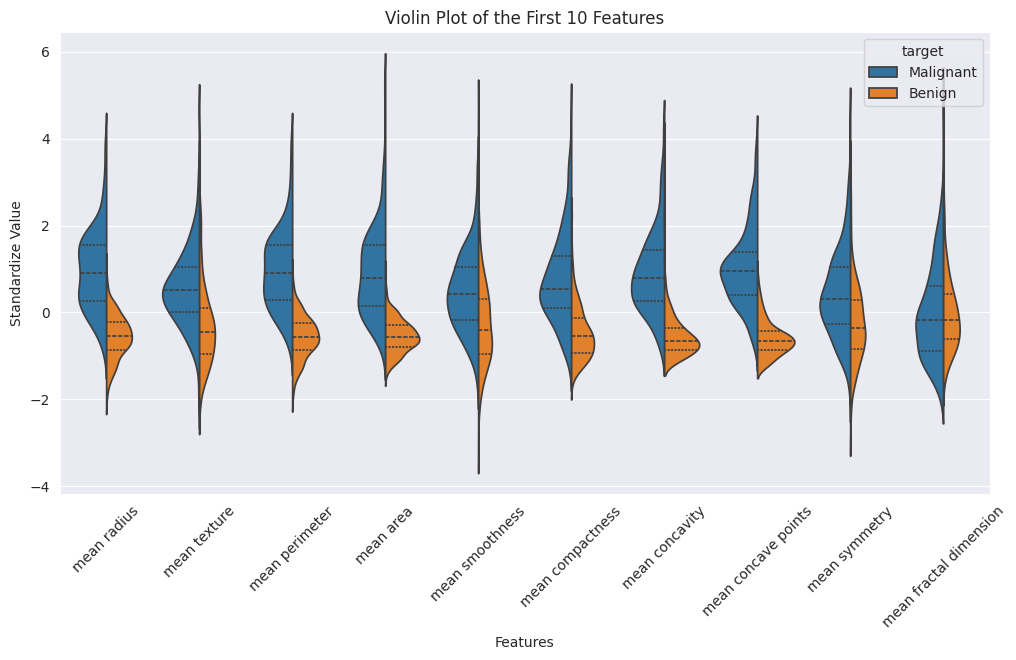

In [25]:
box_plot(df.columns[20:30], "Box Plot of the Last 10 Features")

The violin plot is very efficient in comparing distributions of different variables. The classification becomes clear in the swarm plot. Finally, the box plots are useful in comparing median and detecing outliers.

From above plots we can draw some insights from the data:

The median of some features are very different between 'malignant' and 'benign'. This seperation can be seen clearly in the box plots. They can be very good features for classification. For examples: mean radius, mean area, mean concave points, worst radius, worst perimeter, worst area, worst concave points.
However, there are distributions looking similar between 'malignant' and 'benign'. For examples: mean smoothness, mean symmetry, mean fractual dimension, smoothness error. These features are weak in classifying data.
Some features have similar distributions, thus might be highly correlated with each other. For example: mean perimeter vs. mean area, mean concavity vs. mean concave points, and worst symmetry vs. worst fractal dimension. We should not include all these hightly correlated varibles in our predicting model.

**Correlation**

As discussed above, some dependent variables in the dataset might be highly correlated with each other. Let's explore the correlation of three examples above.

In [39]:
import seaborn as sns
import matplotlib.pyplot as plt

def correlation(var):
    """
    1. Print correlation
    2. Create jointplot
    """
    # Print correlation
    print("Correlation: ", df[[var[0], var[1]]].corr().iloc[1, 0])

    # Create jointplot
    plt.figure(figsize=(6, 6))
    # Pass data as a single argument with 'x' and 'y' specified
    sns.jointplot(data=df, x=var[0], y=var[1], kind='reg')

Correlation:  0.9865068039913907


<Figure size 600x600 with 0 Axes>

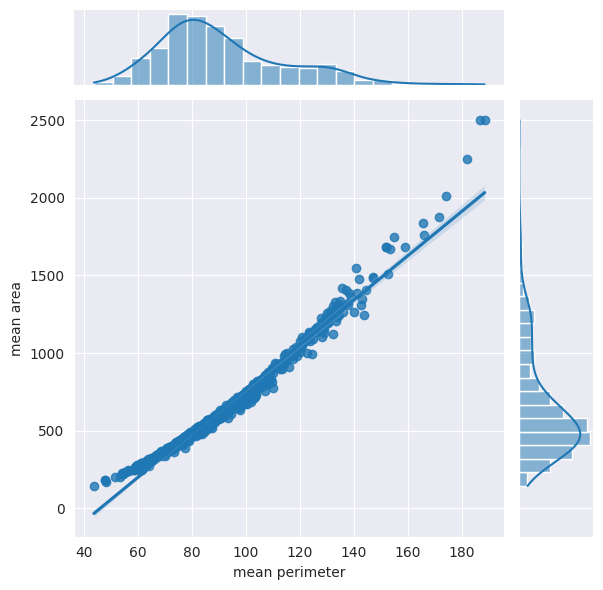

In [40]:
correlation(['mean perimeter', 'mean area'])

Correlation:  0.9213910263788588


<Figure size 600x600 with 0 Axes>

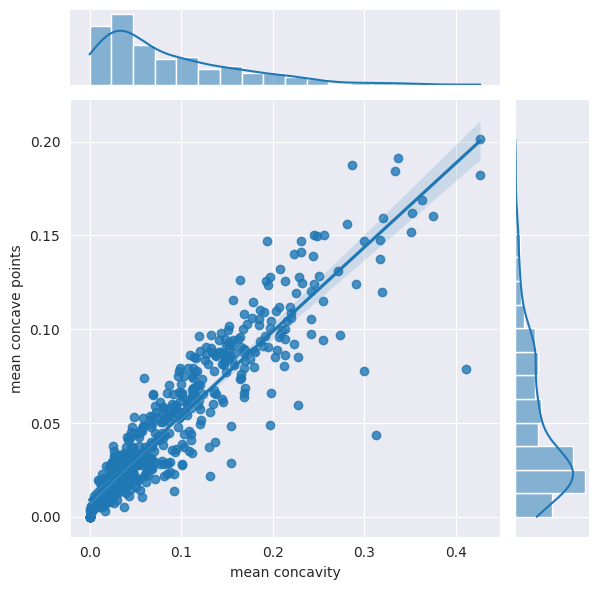

In [41]:
correlation(['mean concavity', 'mean concave points'])

Correlation:  0.537848206253609


<Figure size 600x600 with 0 Axes>

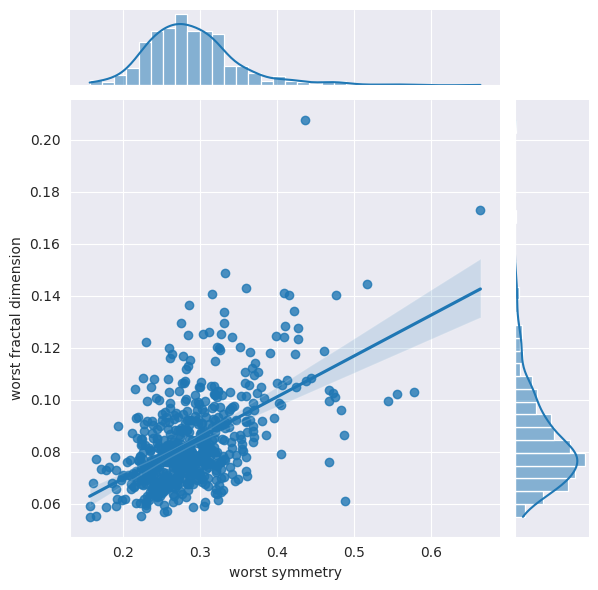

In [42]:
correlation(['worst symmetry', 'worst fractal dimension'])

<Axes: >

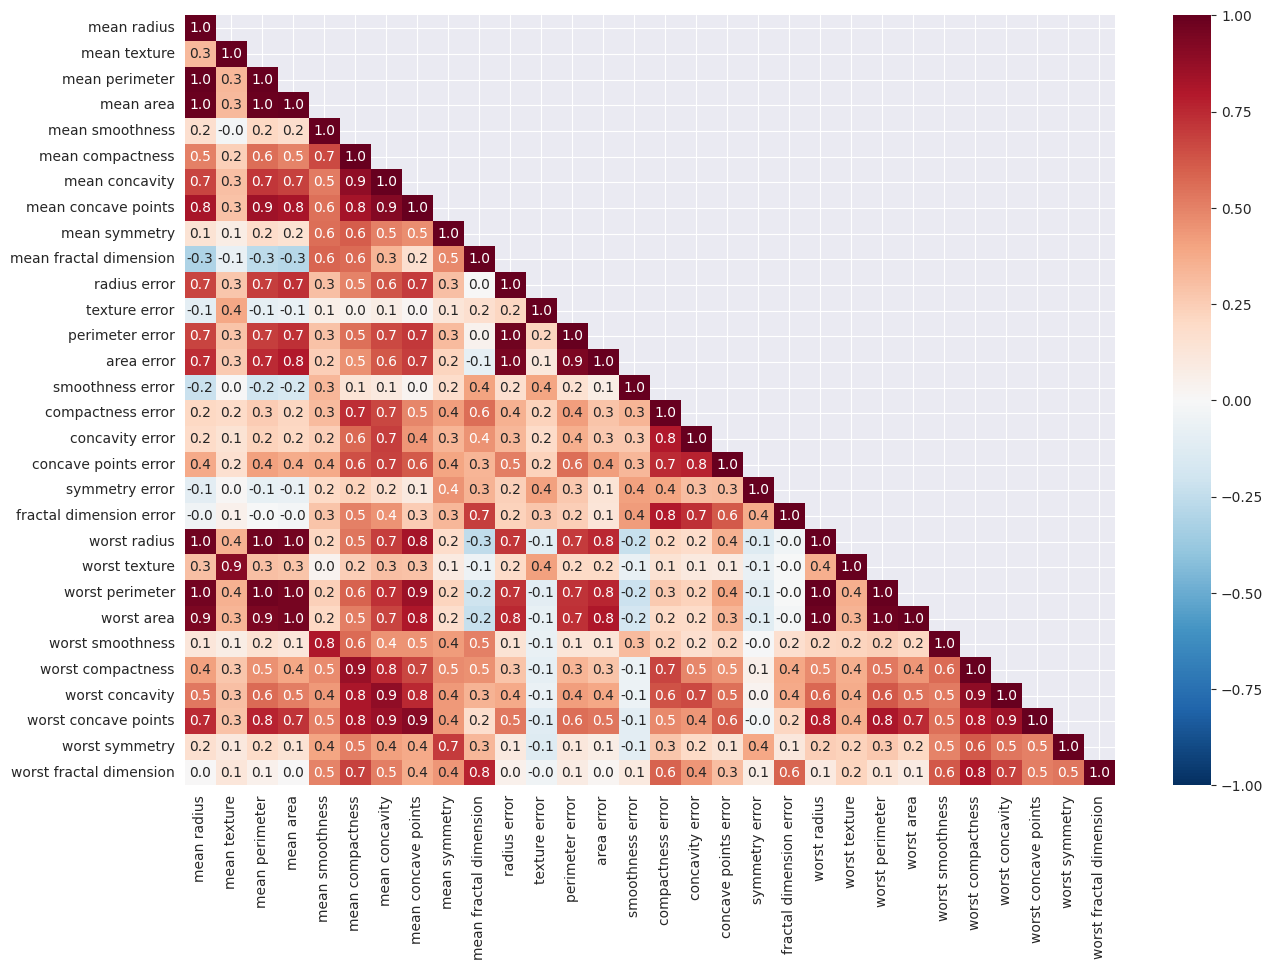

In [48]:
# Create correlation matrix
corr_mat = df.select_dtypes(include=np.number).corr()

# Create mask
mask = np.zeros_like(corr_mat, dtype=bool) # Use bool instead of np.bool
mask[np.triu_indices_from(mask, k=1)] = True

# Plot heatmap
plt.figure(figsize=(15, 10))
sns.heatmap(corr_mat, annot=True, fmt='.1f',
            cmap='RdBu_r', vmin=-1, vmax=1,
            mask=mask)

From the heat map, we can see that many variables in the dataset are highly correlated. What are variables having correlation greater than 0.8?

<Axes: >

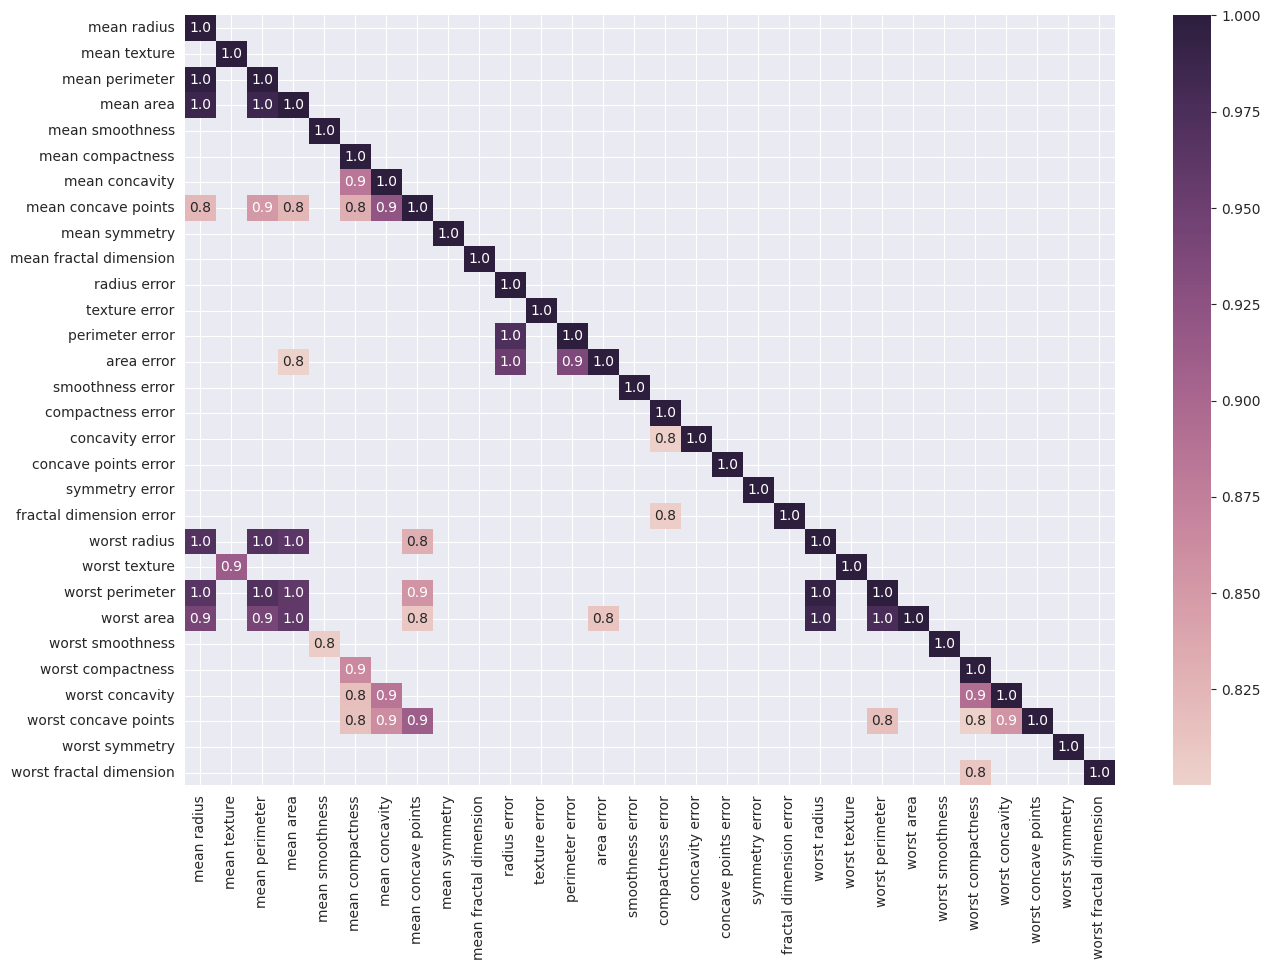

In [51]:
plt.figure(figsize=(15, 10))
sns.heatmap(corr_mat[corr_mat > 0.8], annot=True,
            fmt='.1f', cmap=sns.cubehelix_palette(200), mask=mask)

Well, we have some work to do with feature selection.

**Part 3 - Create Model**

**1. Feature Selection and Random Forest Classifier**

Feature selection
**bold text**
I will use Univariate Feature Selection (sklearn.feature_selection.SelectKBest) to choose 5 features with the k highest scores. I choose 5 because from the heatmap I could see about 5 groups of features that are highly correlated.

In [52]:
from sklearn.feature_selection import SelectKBest, chi2
feature_selection = SelectKBest(chi2, k=5)
feature_selection.fit(df_features, df_target)
selected_features = df_features.columns[feature_selection.get_support()]
print("The five selected features are: ", list(selected_features))

The five selected features are:  ['mean perimeter', 'mean area', 'area error', 'worst perimeter', 'worst area']


In [53]:
X = pd.DataFrame(feature_selection.transform(df_features),
                 columns=selected_features)
X.head()

,mean perimeter,mean area,area error,worst perimeter,worst area
0,122.80,1001.0,153.40,184.60,2019.0
1,132.90,1326.0,74.08,158.80,1956.0
2,130.00,1203.0,94.03,152.50,1709.0
3,77.58,386.1,27.23,98.87,567.7
4,135.10,1297.0,94.44,152.20,1575.0


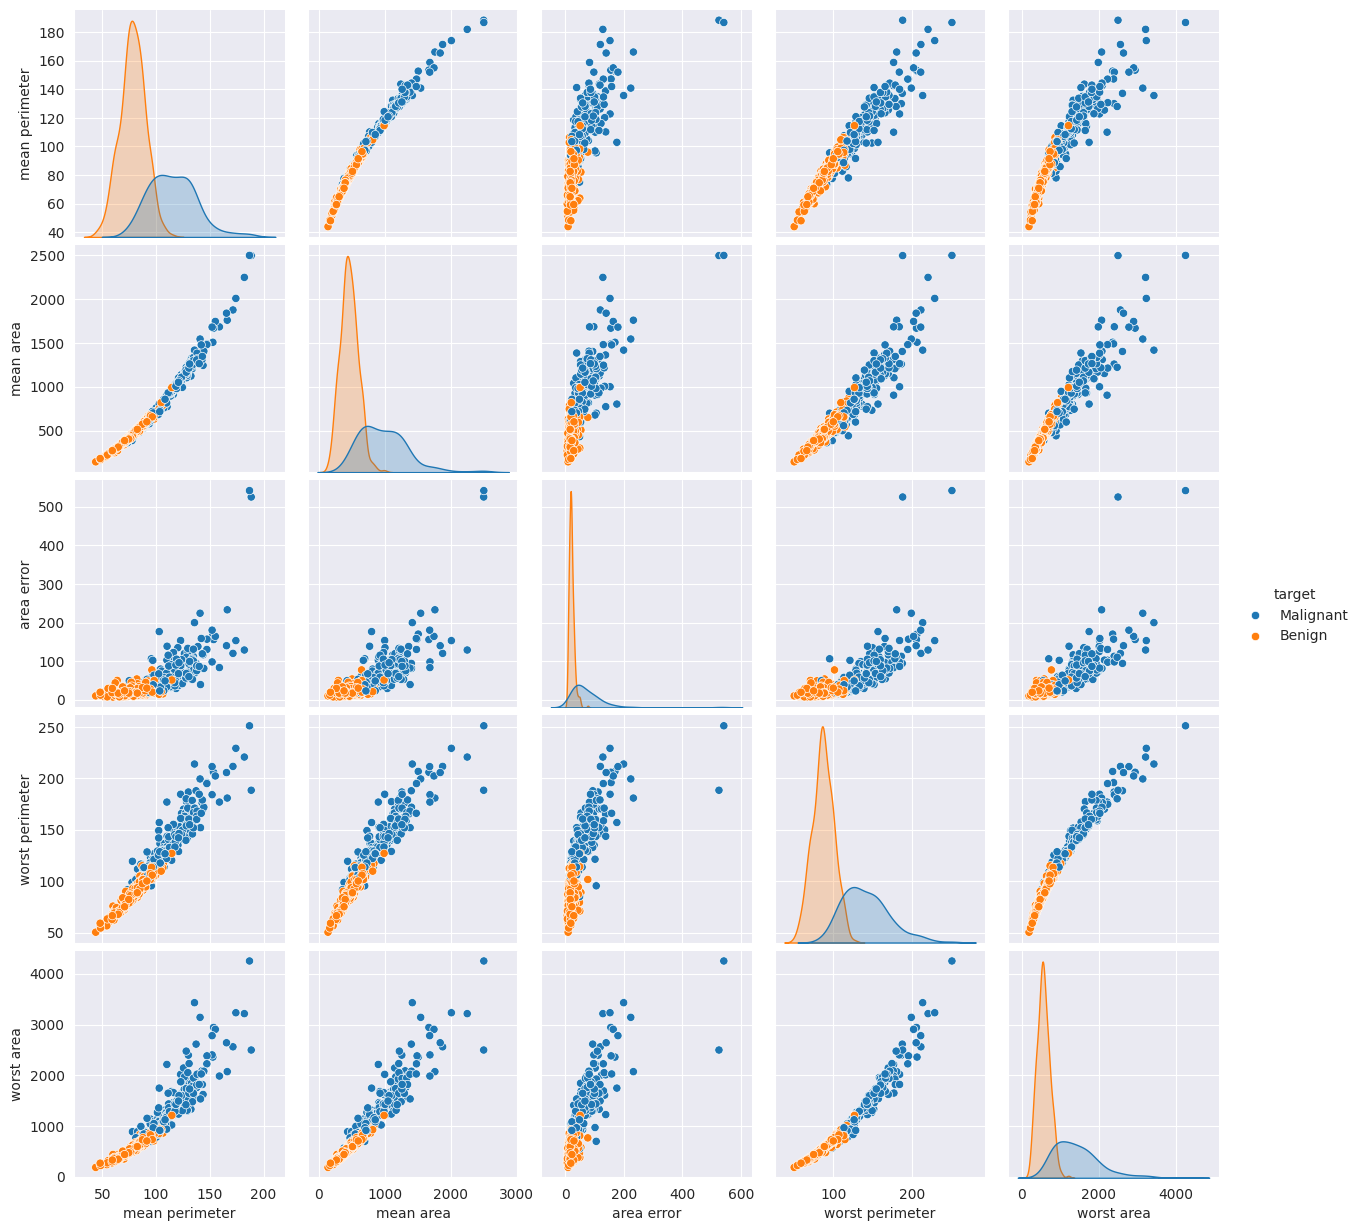

In [54]:
sns.pairplot(pd.concat([X, df['target']], axis=1), hue='target')

**Train test split**

In [55]:
from sklearn.model_selection import train_test_split
y = df_target['target']
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.33, random_state=42)

**Random Forest Classifier**

In [56]:
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier(n_estimators=200)
rfc.fit(X_train, y_train)
y_pred = rfc.predict(X_test)


In [58]:
from sklearn.metrics import confusion_matrix, classification_report
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("\n")
print("Classification Report:\n", classification_report(y_test, y_pred))

Confusion Matrix:
 [[ 63   4]
 [  4 117]]


Classification Report:
               precision    recall  f1-score   support

           0       0.94      0.94      0.94        67
           1       0.97      0.97      0.97       121

    accuracy                           0.96       188
   macro avg       0.95      0.95      0.95       188
weighted avg       0.96      0.96      0.96       188



he accuracy rate is approximately 97%. The model only makes 5 wrong predictions out of 188. Our chosen features are pretty good in identifying cancer

**2. PCA and SVM
Feature extraction using principal component analysis (PCA) bold text**

In [59]:
from sklearn.decomposition import PCA

Principal component analysis (PCA) performs linear dimensionality reduction using Singular Value Decomposition of the data to project it to a lower dimensional space.

PCA transforms the data into features that explain the most variance in the data.

For a better performance of PCA, we first need to scale our data so that each features has a single unit variance. I have done this step in EDA.

In [60]:
features_scaled.head(5)

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,1.097064,-2.073335,1.269934,0.984375,1.568466,3.283515,2.652874,2.532475,2.217515,2.255747,...,1.886690,-1.359293,2.303601,2.001237,1.307686,2.616665,2.109526,2.296076,2.750622,1.937015
1,1.829821,-0.353632,1.685955,1.908708,-0.826962,-0.487072,-0.023846,0.548144,0.001392,-0.868652,...,1.805927,-0.369203,1.535126,1.890489,-0.375612,-0.430444,-0.146749,1.087084,-0.243890,0.281190
2,1.579888,0.456187,1.566503,1.558884,0.942210,1.052926,1.363478,2.037231,0.939685,-0.398008,...,1.511870,-0.023974,1.347475,1.456285,0.527407,1.082932,0.854974,1.955000,1.152255,0.201391
3,-0.768909,0.253732,-0.592687,-0.764464,3.283553,3.402909,1.915897,1.451707,2.867383,4.910919,...,-0.281464,0.133984,-0.249939,-0.550021,3.394275,3.893397,1.989588,2.175786,6.046041,4.935010
4,1.750297,-1.151816,1.776573,1.826229,0.280372,0.539340,1.371011,1.428493,-0.009560,-0.562450,...,1.298575,-1.466770,1.338539,1.220724,0.220556,-0.313395,0.613179,0.729259,-0.868353,-0.397100


In [61]:
X_scaled = features_scaled

In [62]:
pca = PCA(n_components=2)
pca.fit(X_scaled)
X_pca = pca.transform(X_scaled)

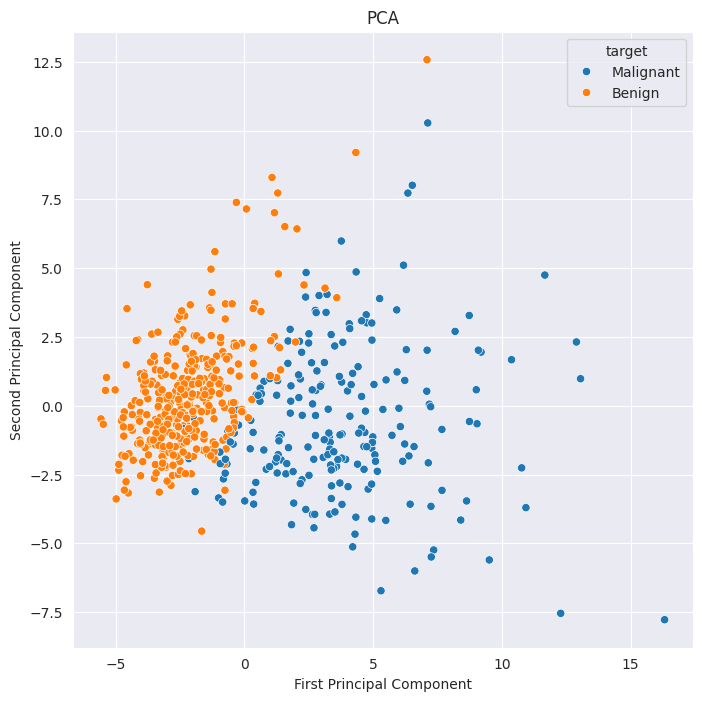

In [66]:
!pip install seaborn
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 8))
# Pass data as a DataFrame for better compatibility with seaborn
sns.scatterplot(x=X_pca[:, 0], y=X_pca[:, 1], hue=df['target'])
plt.title("PCA")
plt.xlabel("First Principal Component")
plt.ylabel("Second Principal Component") # Corrected to ylabel for the second component
plt.show()

We can use the two principal components to clearly separace our data between Malignant and Benig

In [65]:
X = X_pca
y = df_target['target']

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.33, random_state=42)

**Support Vector Machines (SVM)**

In [67]:
from sklearn.svm import SVC

GridSearch

In [68]:
from sklearn.model_selection import GridSearchCV

param_grid = {'C': [0.1, 1, 10, 100, 1000],
              'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
              'kernel': ['rbf']}

grid = GridSearchCV(SVC(), param_grid, refit=True, cv=5)

grid.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=SVC(),
             param_grid={'C': [0.1, 1, 10, 100, 1000],
                         'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
                         'kernel': ['rbf']})

In [69]:
grid.best_params_

{'C': 1000, 'gamma': 0.001, 'kernel': 'rbf'}

In [70]:
y_pred = grid.predict(X_test)

**Model Evaluation**

In [71]:
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("\n")
print("Classification Report:\n",classification_report(y_test, y_pred))

Confusion Matrix:
 [[ 62   5]
 [  5 116]]


Classification Report:
               precision    recall  f1-score   support

           0       0.93      0.93      0.93        67
           1       0.96      0.96      0.96       121

    accuracy                           0.95       188
   macro avg       0.94      0.94      0.94       188
weighted avg       0.95      0.95      0.95       188



The accuracy rate is 95%. This model made a bit more wrong predictions than the Random Forest model. However, with PCA, we can reduce the number of dimensions in our data.

**Part 4 - Conclusion**

In the first part of this project, I performed exploratory data analysis to better understand each of 30 original features and how they might be associated with cancer.

Next, I selected 5 best features for my model using univariate feature selection, and performed Random Forst classifier. The accuracy rate of this model is 97%.

In addition, I used PCA to find the two principal components and created visualization based on these two variables. The visualization shows that with only two variables, we can clearly separate the data between cancer and no cancer. Finally, I preformed Support Vector Machines model to predict cancer based on PCA. The accuracy rate of this model is 95%.

In fact, this data set is quite easy for machine learning models to classify. However, my purpose of doing this project is to learn how to mine data by exploring each feature, select features for my model, and perform various machine learning models.

I hope you enjoy this project. If you have any questions, please feel free to contact me. Thanks for reading!